In [93]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.linear_model import Perceptron
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import random
from time import time
from sklearn.model_selection import cross_val_score

## Support Vector Machines
- SVM's are used to find lines the allow for the separatation of data
- SVM's aditionally find the line of maximum width such that no points are misclassified. This additional requirement makes svms more consitantly accurate than simpler linear sepparation methods
- The following examples look at how an SVM is able to classify data generated from an AND, OR, and XOR patterns

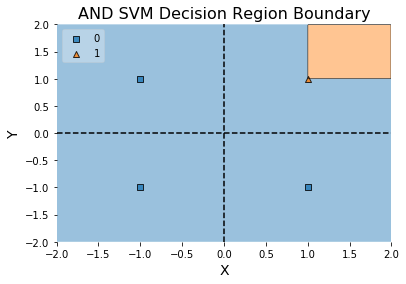

In [94]:
### And with simple data
and_df = pd.DataFrame({'X': [1, 1, -1, -1],
                       'Y': [1, -1, -1, 1]  ,
                   'Label': [1, 0, 0, 0]})

X = and_df[['X', 'Y']]
y = and_df['Label']

clf = svm.SVC(kernel='rbf', gamma='auto')
clf.fit(X.values, y.values) 

plot_decision_regions(X=X.values, y=y.values, clf=clf, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('AND SVM Decision Region Boundary', size=16)
plt.axvline(x=0, color='black', linestyle='--')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

accuracy: 98.0%


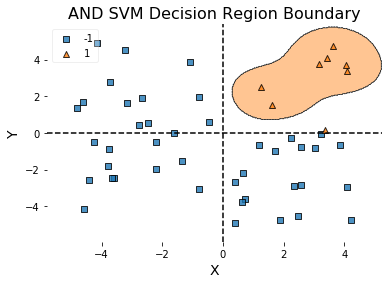

In [95]:
### And with random data
def and_label(df):
    rtn = []
    for i in range(50):
        if df['X'][i] >= 0 and df['Y'][i] >= 0:
            rtn.append(1)
        else:
            rtn.append(-1)
    return rtn

and_df = pd.DataFrame({'X': np.random.uniform(low=-5, high=5, size=50),
                       'Y': np.random.uniform(low=-5, high=5, size=50)})
and_df['Label'] = and_label(and_df)

X = and_df[['X', 'Y']]
y = and_df['Label']

clf = svm.SVC(kernel='rbf', gamma='auto')
clf.fit(X.values, y.values) 

print("accuracy: " + str(clf.score(X.values, y.values)*100 )+ "%")

plot_decision_regions(X=X.values, y=y.values, clf=clf, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('AND SVM Decision Region Boundary', size=16)
plt.axvline(x=0, color='black', linestyle='--')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

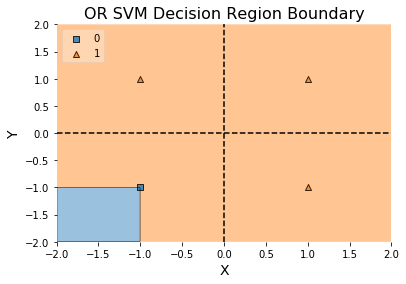

In [96]:
### Or with simple data
or_df = pd.DataFrame({'X': [1, 1, -1, -1],
                      'Y': [1, -1, -1, 1]  ,
                  'Label': [1, 1, 0, 1]})

X = or_df[['X', 'Y']]
y = or_df['Label']

clf = svm.SVC(kernel='rbf', gamma='auto')
clf.fit(X.values, y.values) 

plot_decision_regions(X=X.values, y=y.values, clf=clf, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('OR SVM Decision Region Boundary', size=16)
plt.axvline(x=0, color='black', linestyle='--')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

accuracy: 100.0%


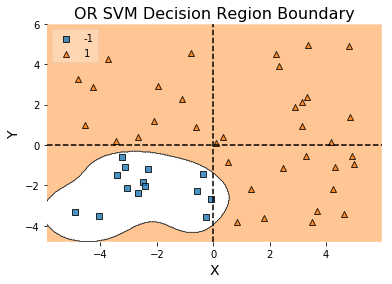

In [97]:
### Or with random data
def or_label(df):
    rtn = []
    for i in range(50):
        if df['X'][i] >= 0 or df['Y'][i] >= 0:
            rtn.append(1)
        else:
            rtn.append(-1)
    return rtn

or_df = pd.DataFrame({'X': np.random.uniform(low=-5, high=5, size=50),
                       'Y': np.random.uniform(low=-5, high=5, size=50)})
or_df['Label'] = or_label(or_df)

X = or_df[['X', 'Y']]
y = or_df['Label']

clf = svm.SVC(kernel='rbf', gamma='auto')
clf.fit(X.values, y.values) 

print("accuracy: " + str(clf.score(X.values, y.values)*100 )+ "%")

plot_decision_regions(X=X.values, y=y.values, clf=clf, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('OR SVM Decision Region Boundary', size=16)
plt.axvline(x=0, color='black', linestyle='--')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

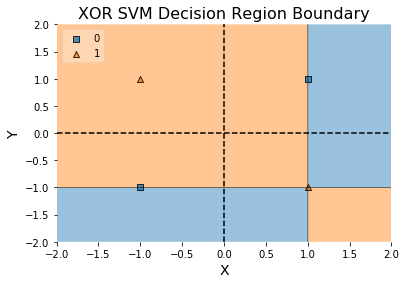

In [98]:
xor_df = pd.DataFrame({'X': [1, 1, -1, -1],
                       'Y': [1, -1, -1, 1]  ,
                   'Label': [0, 1, 0, 1]})

X = xor_df[['X', 'Y']]
y = xor_df['Label']

clf = svm.SVC(decision_function_shape='ovo', gamma='auto')
clf.fit(X.values, y.values) 

plot_decision_regions(X=X.values, y=y.values, clf=clf, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('XOR SVM Decision Region Boundary', size=16)
plt.axvline(x=0, color='black', linestyle='--')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

accuracy: 100.0%


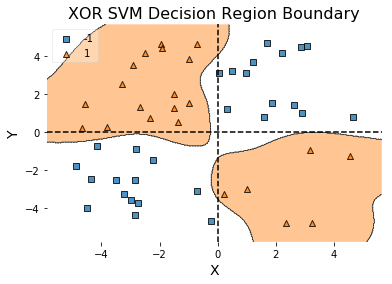

In [99]:
def xor_label(df):
    rtn = []
    for i in range(50):
        if (df['X'][i] >= 0 and df['Y'][i] < 0) or (df['X'][i] < 0 and df['Y'][i] >= 0):
            rtn.append(1)
        else:
            rtn.append(-1)
    return rtn
xor_df = pd.DataFrame({'X': np.random.uniform(low=-5, high=5, size=50),
                       'Y': np.random.uniform(low=-5, high=5, size=50)})
xor_df['Label'] = xor_label(xor_df)

X = xor_df[['X', 'Y']]
y = xor_df['Label']

clf = svm.SVC(decision_function_shape='ovo', gamma='auto')
clf.fit(X.values, y.values) 

print("accuracy: " + str(clf.score(X.values, y.values)*100 )+ "%")

plot_decision_regions(X=X.values, y=y.values, clf=clf, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('XOR SVM Decision Region Boundary', size=16)
plt.axvline(x=0, color='black', linestyle='--')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

#### The Takeaway
- SVM's allow for more complicated classifications than what can be achieved with a single straight line.
  - An SVM can classify nonlinear XOR data, though the classification for multiple datapoints ends up being globular
  - There is still some misclassification around the edges of the decision boundary
  - The classifier is bounded by the range of the data; it does not always extend out accurately to infinity

## Comparison of Perceptron against a hard-margin SVM Classifier
- Both the perceptron algorithm and support vector machines can be used to separate data with a line, but which one better on average?
- To answer this question we will be training a perceptron and a svm on the same training set and then comparing their respective accuracies labeling a test set.

In [100]:
#function to define plots
def define_plot(clf, X, y, title, index, dims):
    plt.subplot(dims[0], dims[1], index)
    plot_decision_regions(X=X.values, y=y.values, clf=clf, legend=2)
    plt.xlabel(X.columns[0], size=14)
    plt.ylabel(X.columns[1], size=14)
    plt.title(title, size=16)
    plt.axvline(x=0, color='black', linestyle='--')
    plt.axhline(y=0, color='black', linestyle='--')

#### Functions for Generating the Training Data

In [101]:
#training data in quadrants 2 and 4
#large improvement with svm when test data was linearly bounded 
    #however, results are very dependent upon how training data is distributed
def x_training_opposite(data_size):
    s = int(data_size/2)
    x_1 = list(np.random.uniform(low=-5, high=-2, size=s))
    x_1.extend(list(np.random.uniform(low=2, high=5, size=s)))
    return x_1

def y_training_opposite(data_size):
    s = int(data_size/2)
    y_1 = list(np.random.uniform(low=2, high=5, size=s)) 
    y_1.extend(list(np.random.uniform(low=-5, high=-2, size=s)))
    return y_1

In [102]:
#training data uniform 
def uniform_data(data_size):
    return np.random.uniform(low=-5, high=5, size=data_size)

In [103]:
#training data bounded between two lines
def data_lin_bound(x_values):
    y_values = []
    intercept = 1
    for i in range(len(x_values)):
        x = x_values[i]
        low_x = x - intercept
        high_x = x + intercept
        y = np.random.uniform(low=low_x, high=high_x, size=1)[0]
        y_values.append(y)
    return y_values

In [104]:
#training data bounded between two lines
def data_lin_bound_2(x_values):
    y_values = []
    intercept_inner = 2
    intercept_outer = 3
    for i in range(len(x_values)):
        x = x_values[i]
        upper_low_x = x + intercept_inner
        upper_high_x = x + intercept_outer
        
        lower_low_x = x - intercept_inner
        lower_high_x = x - intercept_outer
        y = 0
        if(random.randint(0,10) >= 5):
            y = np.random.uniform(low=upper_low_x, high=upper_high_x, size=1)[0]
        else:
            y = np.random.uniform(low=lower_low_x, high=lower_high_x, size=1)[0]
        y_values.append(y)
    return y_values

#### Function Used to Label the Generated Data

In [105]:
### Simple perceptron And with random data
def and_label(df):
    rtn = []
    for i in range(df.shape[0]):
        if df['X'][i] >= df['Y'][i]:
            rtn.append(1)
        else:
            rtn.append(-1)
    return rtn

#### Function for a single run through of training and testing a model

In [106]:
def single_iteration(training_samples, test_sets, test_samples, training_type, test_type):
    training_data_size = 50
    #number of samples for each trial
    test_data_size = 200
    #number of trials
    trials = 10

    gaussian_x_loc = 0
    gaussian_y_loc = 0
    gaussian_x_scale = 2.5
    gaussian_y_scale = 1.5

    percep_avg_train = 0
    percep_avg_test = 0
    svm_avg_train = 0
    svm_avg_test = 0
    
    perceptron_time = 0
    svm_time = 0
    
    if(training_type == 'opp'):
        x_1 = x_training_opposite(training_data_size)
        y_1 = y_training_opposite(training_data_size)
    elif(training_type == 'uniform'):
        x_1 = uniform_data(training_data_size)
        y_1 = uniform_data(training_data_size)
    elif(training_type == "lin"):
        x_1 = uniform_data(training_data_size)
        y_1 = data_lin_bound(x_1)
    elif(training_type == "lin2"):
        x_1 = uniform_data(training_data_size)
        y_1 = data_lin_bound_2(x_1)
    else:
        x_1 = x_training_opposite(training_data_size)
        y_1 = y_training_opposite(training_data_size)
            

    and_df_train = pd.DataFrame({'X': x_1,
                           'Y': y_1})
    and_df_train['Label'] = and_label(and_df_train)

    X = and_df_train[['X', 'Y']]
    y = and_df_train['Label']

    clf_perceptron = Perceptron(tol=1e-3, random_state=0)
    t_1 = time()
    clf_perceptron.fit(X.values, y.values) 
    perceptron_time = time() - t_1
    
    clf_linear_svm = svm.SVC(kernel='linear', C = 1.0)
    t_1 = time()
    clf_linear_svm.fit(X.values, y.values)

    svm_time = time() - t_1
    
    percep_avg_train = (clf_perceptron.score(X.values, y.values))
    svm_avg_train = (clf_linear_svm.score(X.values, y.values))

    for _ in range(trials):

        if(test_type == 'uniform'):
            x_test = uniform_data(test_data_size)
            y_test = uniform_data(test_data_size)
        elif(test_type == 'gauss'):
            x_test = np.random.normal(loc=gaussian_x_loc, scale=gaussian_x_scale, size=test_data_size)
            y_test = np.random.normal(loc=gaussian_y_loc, scale=gaussian_y_scale, size=test_data_size)
        elif(test_type == 'lin'):
            x_test = uniform_data(test_data_size)
            y_test = data_lin_bound(x_test)
        elif(training_type == "lin2"):
            x_test = uniform_data(test_data_size)
            y_test = data_lin_bound_2(x_test)
        else:
            x_test = uniform_data(test_data_size)
            y_test = data_lin_bound(x_test)

        and_df_test = pd.DataFrame({'X': x_test,
                               'Y': y_test})
        and_df_test['Label'] = and_label(and_df_test)

        X_test = and_df_test[['X', 'Y']]
        y_test = and_df_test['Label']


        percep_avg_test += (clf_perceptron.score(X_test.values, y_test.values))
        svm_avg_test += (clf_linear_svm.score(X_test.values, y_test.values))

    plt.figure(figsize=(22,12))
    dims = [2,2]

    #plot perceptron training data
    define_plot(clf_perceptron, X, y, 'Training AND Perceptron Decision Region Boundary', 1, dims)

    #plot linear svm training data
    define_plot(clf_linear_svm, X, y, 'Training AND Linear SVM Decision Region Boundary', 2, dims)

    #plot perceptron test data
    define_plot(clf_perceptron, X_test, y_test, 'Test AND Perceptron Decision Region Boundary', 3, dims)

    #plot linear svm test data
    define_plot(clf_linear_svm, X_test, y_test, 'Test AND Linear SVM Decision Region Boundary', 4, dims)

    print("accuracy of Perceptron on training data for 50 training data points: " + str(100*percep_avg_train) + "%")
    print("accuracy of linear svm on training data for 50 training data points: " + str(100*svm_avg_train) + "%")

    print("accuracy of Perceptron on test data over " + str(trials) + " sets of 100 data points: " + str(100*percep_avg_test/trials) + "%")
    print("accuracy of linear svm on test data over " + str(trials) + " sets of 100 data points: " + str(100*svm_avg_test/trials) + "%")

    print("time taken in milliseconds to fit perceptron: {0:.4f}".format(perceptron_time*1000))
    print("time taken in milliseconds to fit svm: {0:.4f}".format(svm_time*1000))
    

#### Function for running multiple trials of training and testing a model

In [107]:
def multiple_iterations(traing_sets, training_samples, test_sets, test_samples, training_type, test_type):
    #training data
    training_data_sets = traing_sets
    training_data_size = training_samples
    #number of trials
    trials = test_sets
    #number of samples for each trial
    test_data_size = test_samples

    gaussian_x_loc = 0
    gaussian_y_loc = 0
    gaussian_x_scale = 2.5
    gaussian_y_scale = 1.5

    percep_avg_train = 0
    percep_avg_test = 0
    svm_avg_train = 0
    svm_avg_test = 0
    
    perceptron_time = 0
    svm_time = 0

    for _ in range(training_data_sets):
        if(training_type == 'opp'):
            x_1 = x_training_opposite(training_data_size)
            y_1 = y_training_opposite(training_data_size)
        elif(training_type == 'uniform'):
            x_1 = uniform_data(training_data_size)
            y_1 = uniform_data(training_data_size)
        elif(training_type == "lin"):
            x_1 = uniform_data(training_data_size)
            y_1 = data_lin_bound(x_1)
        elif(training_type == "lin2"):
            x_1 = uniform_data(training_data_size)
            y_1 = data_lin_bound_2(x_1)
        else:
            x_1 = x_training_opposite(training_data_size)
            y_1 = y_training_opposite(training_data_size)
            
        and_df_train = pd.DataFrame({'X': x_1,
                           'Y': y_1})
        and_df_train['Label'] = and_label(and_df_train)

        X = and_df_train[['X', 'Y']]
        y = and_df_train['Label']

        clf_perceptron = Perceptron(tol=1e-3, random_state=0)
        t_1 = time()
        clf_perceptron.fit(X.values, y.values) 
        perceptron_time += time() - t_1
        
        clf_linear_svm = svm.SVC(kernel='linear', C = 1.0)
        t_1 = time()
        clf_linear_svm.fit(X.values, y.values)
        svm_time += time() - t_1

        percep_avg_train += (clf_perceptron.score(X.values, y.values))
        svm_avg_train += (clf_linear_svm.score(X.values, y.values))

        for _ in range(trials):

            if(test_type == 'uniform'):
                x_test = uniform_data(test_data_size)
                y_test = uniform_data(test_data_size)
            elif(test_type == 'gauss'):
                x_test = np.random.normal(loc=gaussian_x_loc, scale=gaussian_x_scale, size=test_data_size)
                y_test = np.random.normal(loc=gaussian_y_loc, scale=gaussian_y_scale, size=test_data_size)
            elif(test_type == 'lin'):
                x_test = uniform_data(test_data_size)
                y_test = data_lin_bound(x_test)
            elif(training_type == "lin2"):
                x_test = uniform_data(test_data_size)
                y_test = data_lin_bound_2(x_test)
            else:
                x_test = uniform_data(test_data_size)
                y_test = data_lin_bound(x_test)

            and_df_test = pd.DataFrame({'X': x_test,
                                   'Y': y_test})
            and_df_test['Label'] = and_label(and_df_test)

            X_test = and_df_test[['X', 'Y']]
            y_test = and_df_test['Label']

            percep_avg_test += (clf_perceptron.score(X_test.values, y_test.values))
            svm_avg_test += (clf_linear_svm.score(X_test.values, y_test.values))

    print("accuracy of Perceptron on training data for " + str(training_data_size) + " training data points over "
          + str(training_data_sets) + " training data sets: " + str(100*percep_avg_train/training_data_sets) + "%")
    print("accuracy of linear svm on training data for " + str(training_data_size) + " training data points over "
          + str(training_data_sets) + " training data sets: " + str(100*svm_avg_train/training_data_sets) + "%")

    print("accuracy of Perceptron on test data over " + str(trials) + " sets of " + str(test_data_size) 
          + " data points using " + str(training_data_sets) + " different training sets: " 
          + str(round(100*percep_avg_test/(training_data_sets*trials))) + "%")
    print("accuracy of linear svm on test data over " + str(trials) + " sets of " + str(test_data_size) 
          + " data points using " + str(training_data_sets) + " different traing sets: " 
          + str(round(100*svm_avg_test/(training_data_sets*trials))) + "%")    


    print("average time taken in milliseconds to fit perceptron: {0:.4f}".format(perceptron_time*1000/training_data_sets))
    print("average time taken in milliseconds to fit svm: {0:.4f}".format(svm_time*1000/training_data_sets))


### Running on a Single Training Set

accuracy of Perceptron on training data for 50 training data points: 100.0%
accuracy of linear svm on training data for 50 training data points: 100.0%
accuracy of Perceptron on test data over 10 sets of 100 data points: 71.74999999999999%
accuracy of linear svm on test data over 10 sets of 100 data points: 96.4%
time taken in milliseconds to fit perceptron: 0.0000
time taken in milliseconds to fit svm: 0.0000


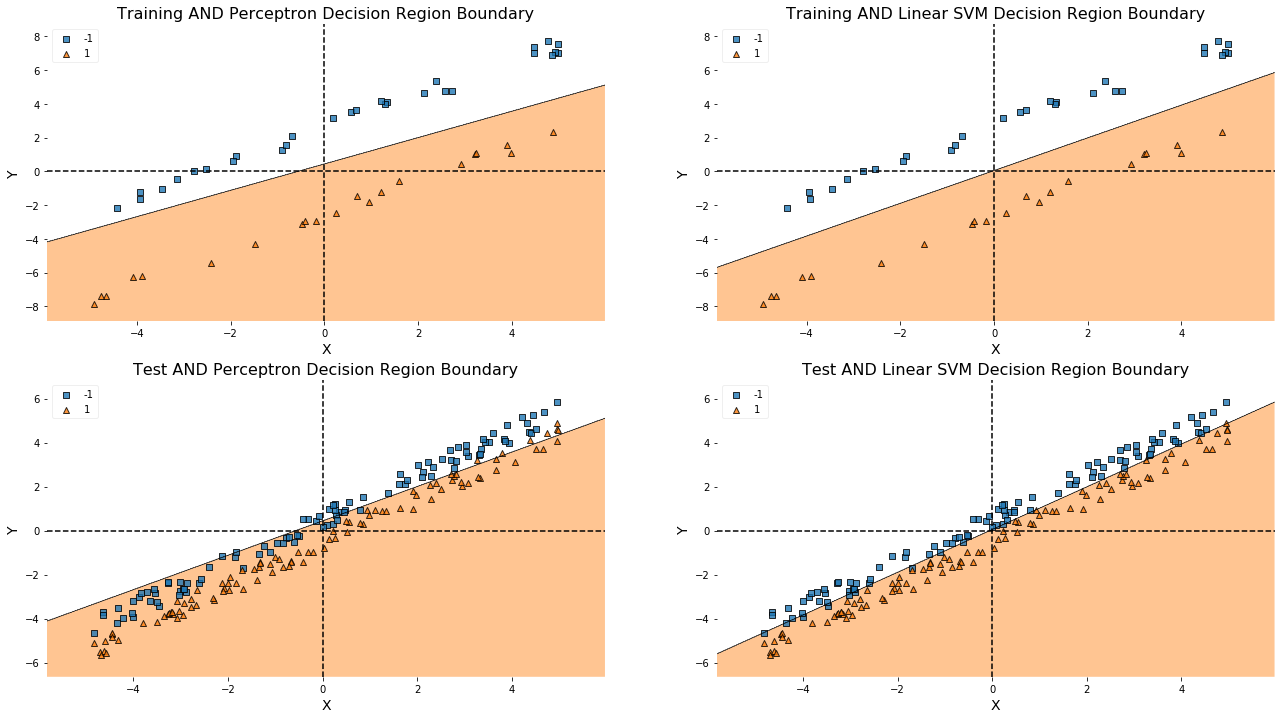

In [108]:
#single_iteration(training_samples, test_sets, test_samples, training_type, test_type)
#number of test_sets specified will be done for each training set
#training_types: opp, uniform, lin,lin2
#test_types: uniform, gauss, lin

single_iteration(50,10,200, 'lin2', 'lin')

- Both the svm and the perceptron were able to converege on a separation for the training data with a high accuracy
- When then tested with a test set, the svm's accuracy is significantly higher than the perceptrons at labeling the test data correctly
- From this we can say the svm found the better linear separation for the data

### Running Multiple Training Data Sets
- To confirm our above findings we will repeat the steps of training and testing both a perceptron and an svm, then average the accuracies of the two for comparison

In [109]:
#multiple_iterations(traing_sets, training_samples, test_sets, test_samples, training_type, test_type)
#number of test_sets specified will be done for each training set
#training_types: opp, uniform, lin
#test_types: uniform, gauss, lin
multiple_iterations(10,50,10,200, 'lin2', 'lin')

accuracy of Perceptron on training data for 50 training data points over 10 training data sets: 100.0%
accuracy of linear svm on training data for 50 training data points over 10 training data sets: 100.0%
accuracy of Perceptron on test data over 10 sets of 200 data points using 10 different training sets: 72.0%
accuracy of linear svm on test data over 10 sets of 200 data points using 10 different traing sets: 97.0%
average time taken in milliseconds to fit perceptron: 1.9604
average time taken in milliseconds to fit svm: 0.0000


- Both the perceptron and SVM produce next to no error when trained.
- The SVM consistantly produces less error after training when tested on the test sets
- However the svm starts taking noticably longer amounts of time to fit than the perceptron

## Using Different Kernels with an SVM and Non-Linear Data

- Not all data is linearly serparable, and the best shape of the separation may not be initially known
- SVM's can use different kernels to try and fit different types of lines to the data to separate it
  - Linear
  - Polynomial
  - Radial Basis Function (RBF)
  - Sigmoid
- For this examply we will be using the above 4 kernels to separate a XOR dataset

In [110]:
def xor_label(df):
    rtn = []
    for i in range(50):
        if (df['X'][i] >= 0 and df['Y'][i] < 0) or (df['X'][i] < 0 and df['Y'][i] >= 0):
            rtn.append(1)
        else:
            rtn.append(-1)
    return rtn
xor_df = pd.DataFrame({'X': np.random.uniform(low=-5, high=5, size=50),
                       'Y': np.random.uniform(low=-5, high=5, size=50)})
xor_df['Label'] = xor_label(xor_df)

X = xor_df[['X', 'Y']]
y = xor_df['Label']

clf_lin = svm.SVC(kernel='linear', gamma='auto')
clf_lin.fit(X.values, y.values) 

clf_poly = svm.SVC(kernel='poly', degree=20, gamma='auto')
clf_poly.fit(X.values, y.values) 

clf_rbf = svm.SVC(kernel='rbf', gamma='auto')
clf_rbf.fit(X.values, y.values) 

clf_sigmoid = svm.SVC(kernel='sigmoid', gamma='auto')
clf_sigmoid.fit(X.values, y.values)
print()

accuracy for linear svm: 78.0%
accuracy for polynomial svm: 98.0%
accuracy for rbf svm: 100.0%
accuracy for sigmoid svm: 44.0%


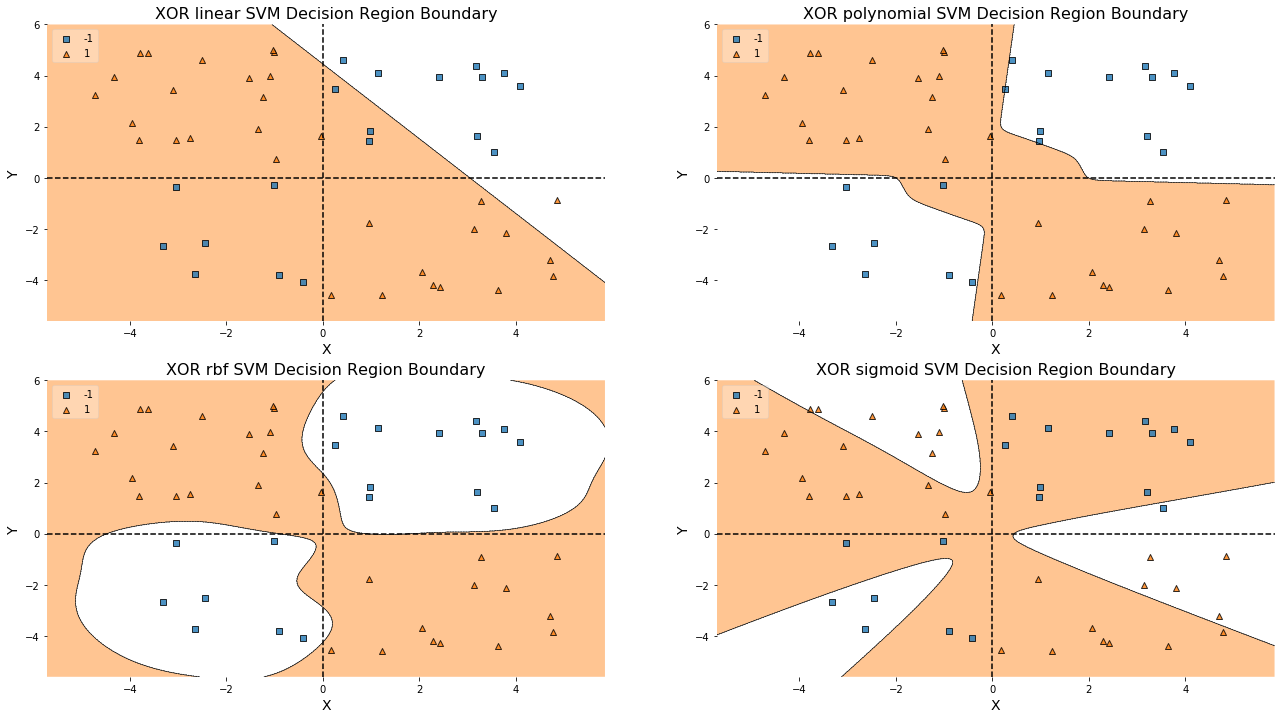

In [111]:
print("accuracy for linear svm: " + str(clf_lin.score(X.values, y.values)*100 )+ "%")
print("accuracy for polynomial svm: " + str(clf_poly.score(X.values, y.values)*100 )+ "%")
print("accuracy for rbf svm: " + str(clf_rbf.score(X.values, y.values)*100 )+ "%")
print("accuracy for sigmoid svm: " + str(clf_sigmoid.score(X.values, y.values)*100 )+ "%")

plt.figure(figsize=(22,12))
dims = [2,2]

#XOR SVM Decision Region Boundary
define_plot(clf_lin, X, y, "XOR linear SVM Decision Region Boundary", 1, dims)
define_plot(clf_poly, X, y, "XOR polynomial SVM Decision Region Boundary", 2, dims)
define_plot(clf_rbf, X, y, "XOR rbf SVM Decision Region Boundary", 3, dims)
define_plot(clf_sigmoid, X, y, "XOR sigmoid SVM Decision Region Boundary", 4, dims)

plt.show()

- Based on the fits to our XOR data, it seems that a polynomial or RBF kernel are typically the most accurate for separating the data.
  - It makes sense that the linear kernel is fairly inaccurate as XOR data cannot be separated with a straight line
  - Similarly a sigmoid line shares the same weakness
  - A polynomial line can more accurately reflect the complexities of the XOR data and is thus the better kernel for the job. This is reflected in its high accuracy

## Soft Margins
- Having soft margins on your svm classifier allows it to potentially misclassify some of the training set when determining the best separation
- The smaller the svm's C value the more points are allowed to be misclassified when training.
- By allowing some of the points around the svm classifier's margin to be misclassified when training, the svm may converge on a line that is more optimal when used on the test set than the line it would have found with hard margins

1
0.1
0.05
0.01


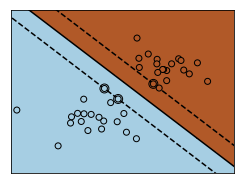

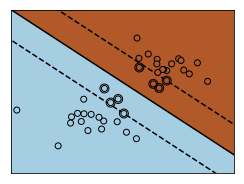

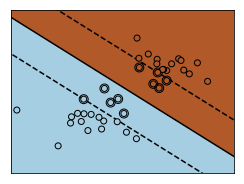

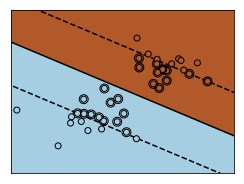

In [112]:
#from scikit learn example
#https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html

# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# figure number
fignum = 1

# fit the model
for name, penalty in (('unreg1', 1), ('unreg', .1), ('reg', 0.05), ('reg2', 0.01)):
    print(str(penalty))
    clf = svm.SVC(kernel='linear', C=penalty)
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

In [113]:
#function to define plots
def define_plot(clf, X, y, title, index, dims):
    plt.subplot(dims[0], dims[1], index)
    plot_decision_regions(X=X.values, y=y.values, clf=clf, legend=2)
    plt.xlabel(X.columns[0], size=14)
    plt.ylabel(X.columns[1], size=14)
    plt.title(title, size=16)
    plt.axvline(x=0, color='black', linestyle='--')
    plt.axhline(y=0, color='black', linestyle='--')

In [114]:
#training data uniform 
def uniform_data(data_size):
    return np.random.uniform(low=-5, high=5, size=data_size)

In [115]:
### Simple perceptron And with random data
### add in noise
def and_label_with_noise(df):
    rtn = []
    offset = 1
    for i in range(df.shape[0]):
        x = df['X'][i]
        y = df['Y'][i]
        if((x<offset and x>-offset) and (y<offset and y>-offset)):
            if(random.randint(0,10) <= 5):
                if df['X'][i] >= df['Y'][i]:
                    rtn.append(-1)
                else:
                    rtn.append(1)
            else:
                if df['X'][i] >= df['Y'][i]:
                    rtn.append(1)
                else:
                    rtn.append(-1)
                    
        else:
            if df['X'][i] >= df['Y'][i]:
                rtn.append(1)
            else:
                rtn.append(-1)
    return rtn

In [116]:
### Simple perceptron And with random data
def and_label(df):
    rtn = []
    for i in range(df.shape[0]):
        if df['X'][i] >= df['Y'][i]:
            rtn.append(1)
        else:
            rtn.append(-1)
    return rtn

In [117]:
x_1 = uniform_data(50)
y_1 = uniform_data(50)

x_2 = uniform_data(200)
y_2 = uniform_data(200)

and_df_train = pd.DataFrame({'X': x_1,
                       'Y': y_1})
and_df_train['Label'] = and_label_with_noise(and_df_train)

X = and_df_train[['X', 'Y']]
y = and_df_train['Label']


and_df_test = pd.DataFrame({'X': x_1,
                       'Y': y_1})
and_df_test['Label'] = and_label(and_df_test)

X_test = and_df_test[['X', 'Y']]
y_test = and_df_test['Label']


In [118]:
clf_perceptron = Perceptron(tol=1e-3, random_state=0)
clf_perceptron.fit(X.values, y.values) 
print()

In [119]:
clf = []
clf_1 = svm.SVC(kernel='linear', C = 1.0)
clf_1.fit(X.values, y.values)

clf_2 = svm.SVC(kernel='linear', C = 0.05)
clf_2.fit(X.values, y.values)

clf_3 = svm.SVC(kernel='linear', C = 0.01)
clf_3.fit(X.values, y.values)

clf_4 = svm.SVC(kernel='linear', C = 0.005)
clf_4.fit(X.values, y.values)
print()

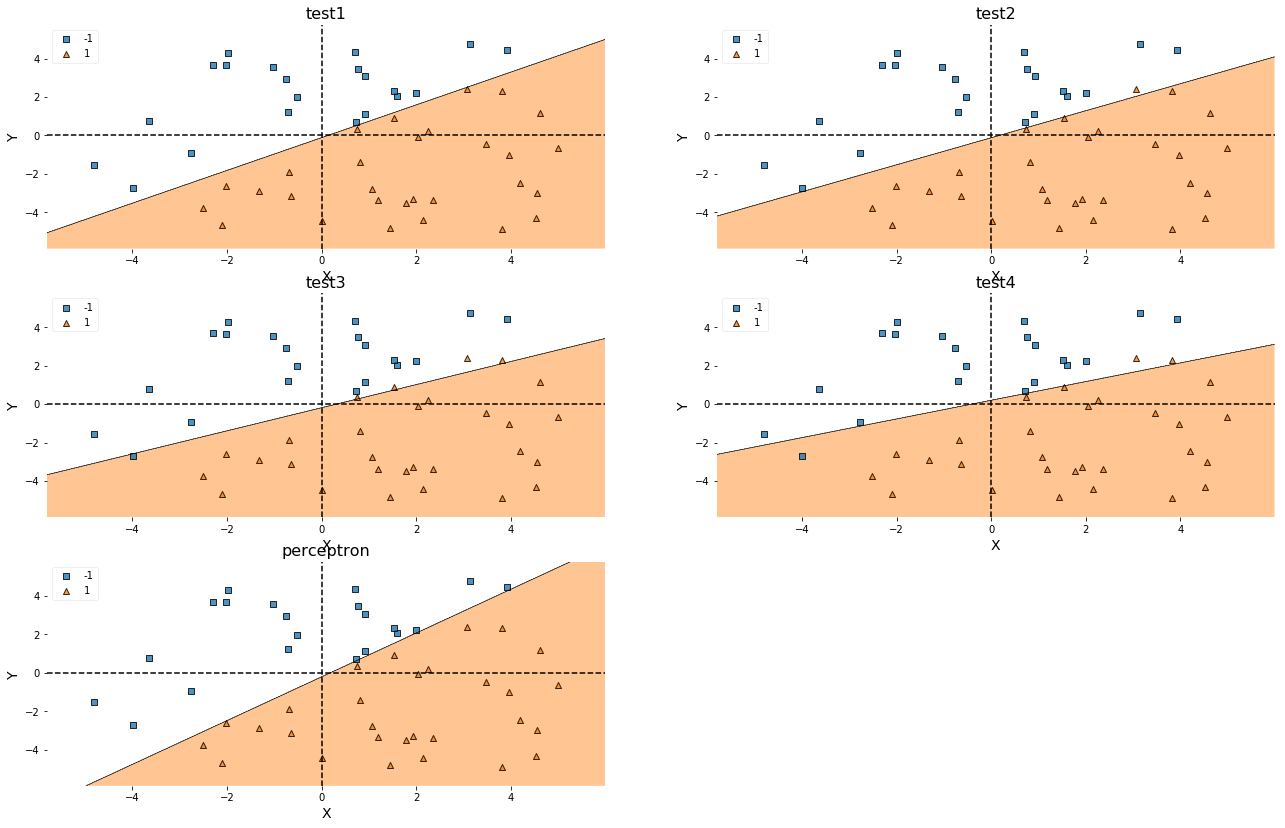

test1 accuracy: 98.0 %
test2 accuracy: 96.0 %
test3 accuracy: 88.0 %
test4 accuracy: 92.0 %


In [120]:
plt.figure(figsize=(22,14))
dims = [3,2]
define_plot(clf_1, X, y, "test1", 1, dims)
define_plot(clf_2, X, y, "test2", 2, dims)
define_plot(clf_3, X, y, "test3", 3, dims)
define_plot(clf_4, X, y, "test4", 4, dims)
define_plot(clf_perceptron, X, y, "perceptron", 5, dims)
plt.show()

print("test1 accuracy: " + str(clf_1.score(X_test.values, y_test.values)*100) + " %")
print("test2 accuracy: " + str(clf_2.score(X_test.values, y_test.values)*100) + " %")
print("test3 accuracy: " + str(clf_3.score(X_test.values, y_test.values)*100) + " %")
print("test4 accuracy: " + str(clf_4.score(X_test.values, y_test.values)*100) + " %")

In [121]:
clf = []
clf_1 = svm.SVC(kernel='rbf', C = 1.0, gamma="auto")
clf_1.fit(X.values, y.values)

clf_2 = svm.SVC(kernel='rbf', C = 0.8, gamma="auto")
clf_2.fit(X.values, y.values)

clf_3 = svm.SVC(kernel='rbf', C = 0.6, gamma="auto")
clf_3.fit(X.values, y.values)

clf_4 = svm.SVC(kernel='rbf', C = 0.4, gamma="auto")
clf_4.fit(X.values, y.values)


SVC(C=0.4, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

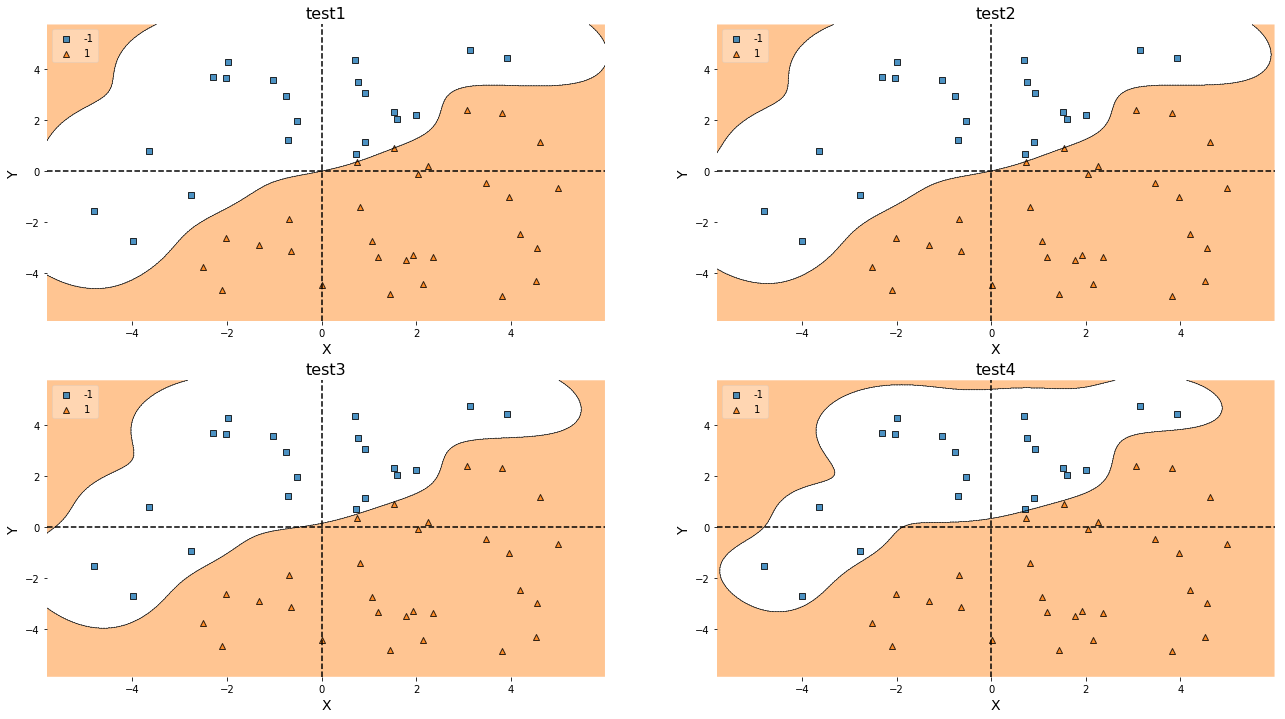

test1 accuracy: 98.0 %
test2 accuracy: 98.0 %
test3 accuracy: 98.0 %
test4 accuracy: 98.0 %


In [122]:
plt.figure(figsize=(22,12))
dims = [2,2]
define_plot(clf_1, X, y, "test1", 1, dims)
define_plot(clf_2, X, y, "test2", 2, dims)
define_plot(clf_3, X, y, "test3", 3, dims)
define_plot(clf_4, X, y, "test4", 4, dims)
plt.show()

print("test1 accuracy: " + str(clf_1.score(X_test.values, y_test.values)*100) + " %")
print("test2 accuracy: " + str(clf_2.score(X_test.values, y_test.values)*100) + " %")
print("test3 accuracy: " + str(clf_3.score(X_test.values, y_test.values)*100) + " %")
print("test4 accuracy: " + str(clf_4.score(X_test.values, y_test.values)*100) + " %")

### Using cross validation to test which kernel types are best for specific data sets
- The use of cross validation is explored through K-Folds cross validation.
- K-Folds breaks the training data into K sets and trains using K-1 sets. The remaining set is used to test. Each set will be used as the test set once.
- The mean accuracies of each test can then be averaged to give an overall mean accuracy. This allows one to evaluate effectiveness of potential classification models with limited training data

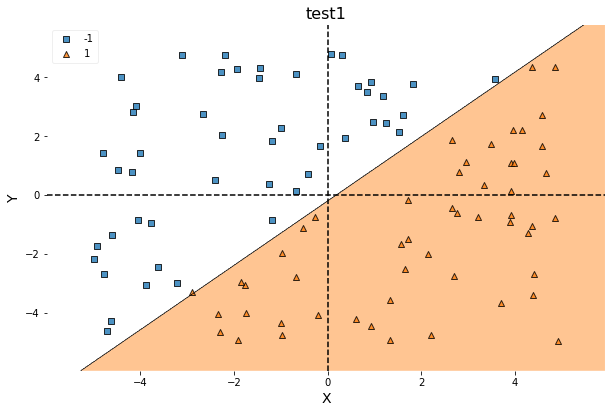

In [123]:
x_1 = uniform_data(100)
y_1 = uniform_data(100)

x_2 = uniform_data(200)
y_2 = uniform_data(200)

and_df_train = pd.DataFrame({'X': x_1,
                       'Y': y_1})
and_df_train['Label'] = and_label_with_noise(and_df_train)

X = and_df_train[['X', 'Y']]
y = and_df_train['Label']


and_df_test = pd.DataFrame({'X': x_2,
                       'Y': y_2})
and_df_test['Label'] = and_label(and_df_test)

X_test = and_df_test[['X', 'Y']]
y_test = and_df_test['Label']

clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X.values, y.values)
plt.figure(figsize=(22,14))
dims = [2,2]
define_plot(clf, X, y, "test1", 1, dims)

In [124]:
clf_1 = svm.SVC(kernel='linear', C = 1.0)
clf_2 = svm.SVC(kernel='poly', degree=2, gamma="auto")
clf_3 = svm.SVC(kernel='poly', degree=5, gamma="auto")
#clf_4 = svm.SVC(kernel='poly', degree=10, gamma="auto")
clf_5 = svm.SVC(kernel='rbf', C = 1.0, gamma="auto")
clf_6 = svm.SVC(kernel='sigmoid', C = 1.0, gamma="auto")


In [125]:
scores_1 = cross_val_score(clf_1, X.values, y.values, cv=5)
scores_2 = cross_val_score(clf_2, X.values, y.values, cv=5)
scores_3 = cross_val_score(clf_3, X.values, y.values, cv=5)
#scores_4 = cross_val_score(clf_4, X.values, y.values, cv=5)
scores_5 = cross_val_score(clf_5, X.values, y.values, cv=5)
scores_6 = cross_val_score(clf_6, X.values, y.values, cv=5)

print("cross validation mean, 95% confidence interval")
print("linear kernel: %0.2f, (+/- %0.2f)" % (scores_1.mean(), scores_1.std() * 2)) 
print("polynomial kernel deg=2: %0.2f, (+/- %0.2f)" % (scores_2.mean(), scores_2.std() * 2)) 
print("polynomial kernel deg=5: %0.2f, (+/- %0.2f)" % (scores_3.mean(), scores_3.std() * 2)) 
#print("polynomial kernel deg=10: %0.2f, (+/- %0.2f)" % (scores_4.mean(), scores_4.std() * 2)) 
print("rbf kernel: %0.2f, (+/- %0.2f)" % (scores_5.mean(), scores_5.std() * 2)) 
print("sigmoid kernel: %0.2f, (+/- %0.2f)" % (scores_6.mean(), scores_6.std() * 2)) 

cross validation mean, 95% confidence interval
linear kernel: 0.98, (+/- 0.05)
polynomial kernel deg=2: 0.47, (+/- 0.08)
polynomial kernel deg=5: 0.95, (+/- 0.07)
rbf kernel: 0.96, (+/- 0.07)
sigmoid kernel: 0.72, (+/- 0.17)


In [126]:
clf_1.fit(X.values, y.values)
clf_2.fit(X.values, y.values)
clf_3.fit(X.values, y.values)
#clf_4.fit(X.values, y.values)
clf_5.fit(X.values, y.values)
clf_6.fit(X.values, y.values)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

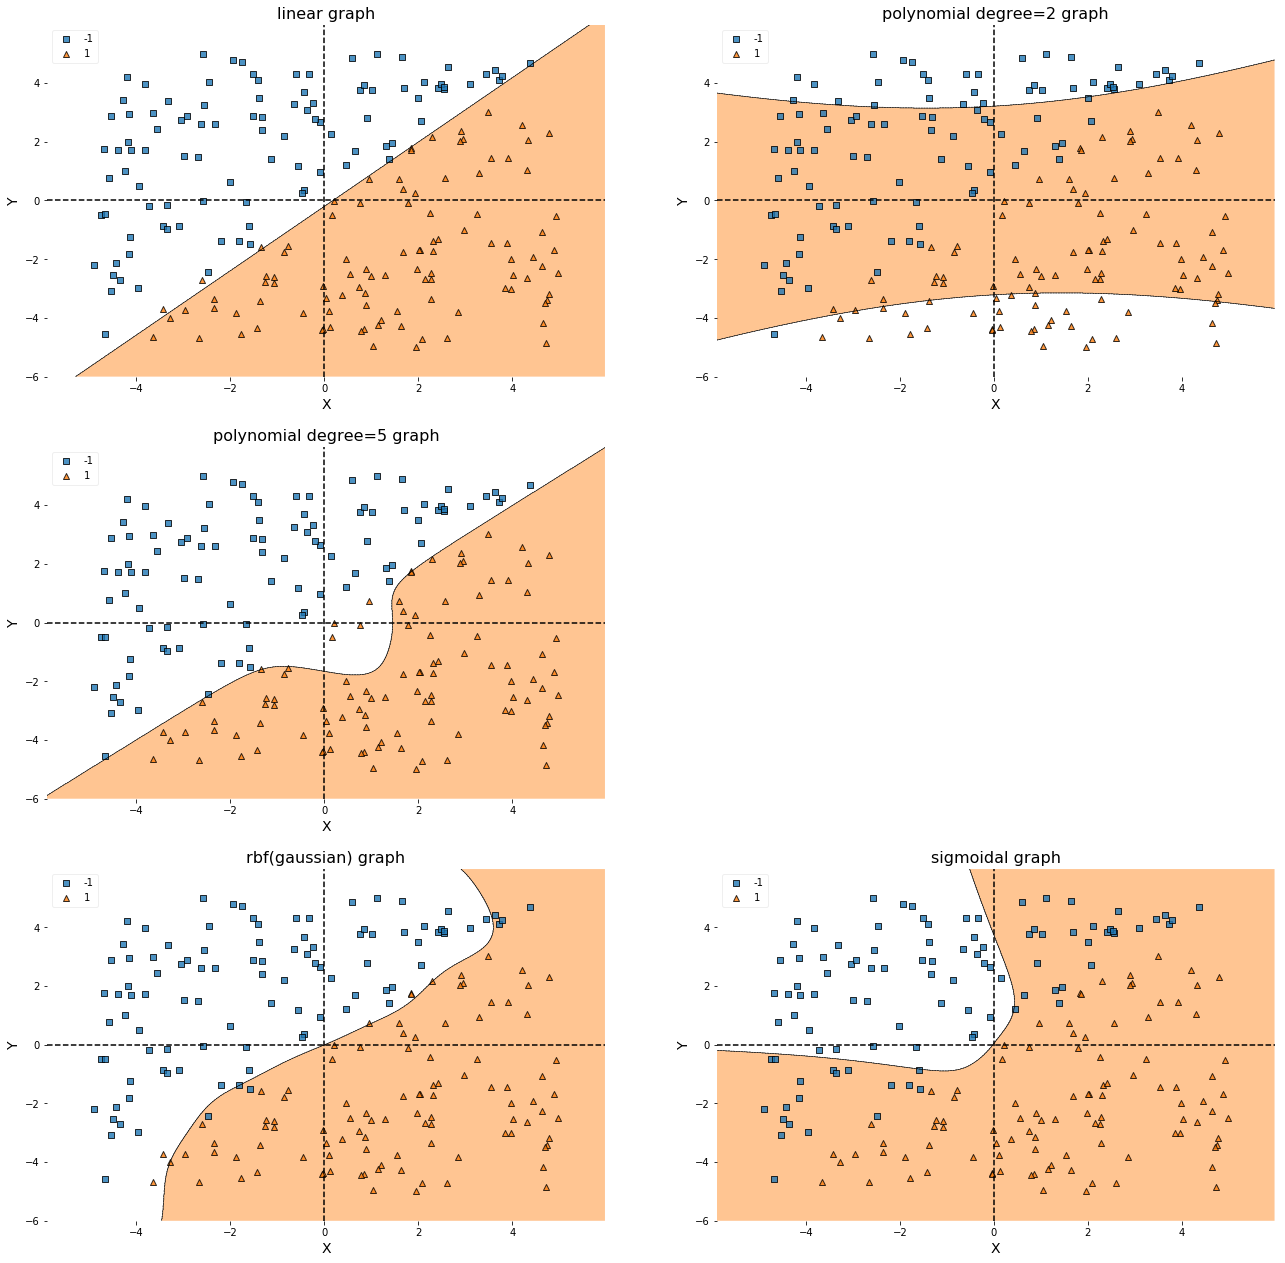

linear accuracy: 98.5 %
polynomial degree=2 accuracy: 53.5 %
polynomial degree=5 accuracy: 97.0 %
rbf accuracy: 94.0 %
sigmoidal accuracy: 77.0 %


In [127]:
plt.figure(figsize=(22,22))
dims = [3,2]
define_plot(clf_1, X_test, y_test, "linear graph", 1, dims)
define_plot(clf_2, X_test, y_test, "polynomial degree=2 graph", 2, dims)
define_plot(clf_3, X_test, y_test, "polynomial degree=5 graph", 3, dims)
#define_plot(clf_4, X_test, y_test, "polynomial degree=10 graph", 4, dims)
define_plot(clf_5, X_test, y_test, "rbf(gaussian) graph", 5, dims)
define_plot(clf_6, X_test, y_test, "sigmoidal graph", 6, dims)
plt.show()

print("linear accuracy: " + str(clf_1.score(X_test.values, y_test.values)*100) + " %")
print("polynomial degree=2 accuracy: " + str(clf_2.score(X_test.values, y_test.values)*100) + " %")
print("polynomial degree=5 accuracy: " + str(clf_3.score(X_test.values, y_test.values)*100) + " %")
#print("polynomial degree=10 accuracy: " + str(clf_4.score(X_test.values, y_test.values)*100) + " %")
print("rbf accuracy: " + str(clf_5.score(X_test.values, y_test.values)*100) + " %")
print("sigmoidal accuracy: " + str(clf_6.score(X_test.values, y_test.values)*100) + " %")